# **Import Library**

In [1]:
import math
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# **Import Data**

In [2]:
df_pg = pd.read_excel('forecastinglstm.xlsx')
df_pg

,Date,Price
0,2018-01-01,12783.678065
1,2018-02-01,12908.028646
2,2018-03-01,12797.553737
3,2018-04-01,12689.833424
4,2018-05-01,12604.199886
...,...,...
65,2023-06-01,13657.195180
66,2023-07-01,13680.269258
67,2023-08-01,13871.605208
68,2023-09-01,14582.197472


In [3]:
df_pg.info()
df_pg.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    70 non-null     datetime64[ns]
 1   Price   70 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB


Date     0
Price    0
dtype: int64

In [4]:
df_pg = df_pg.dropna()
df_pg.isna().sum()

Date     0
Price    0
dtype: int64

# **Plot Data**

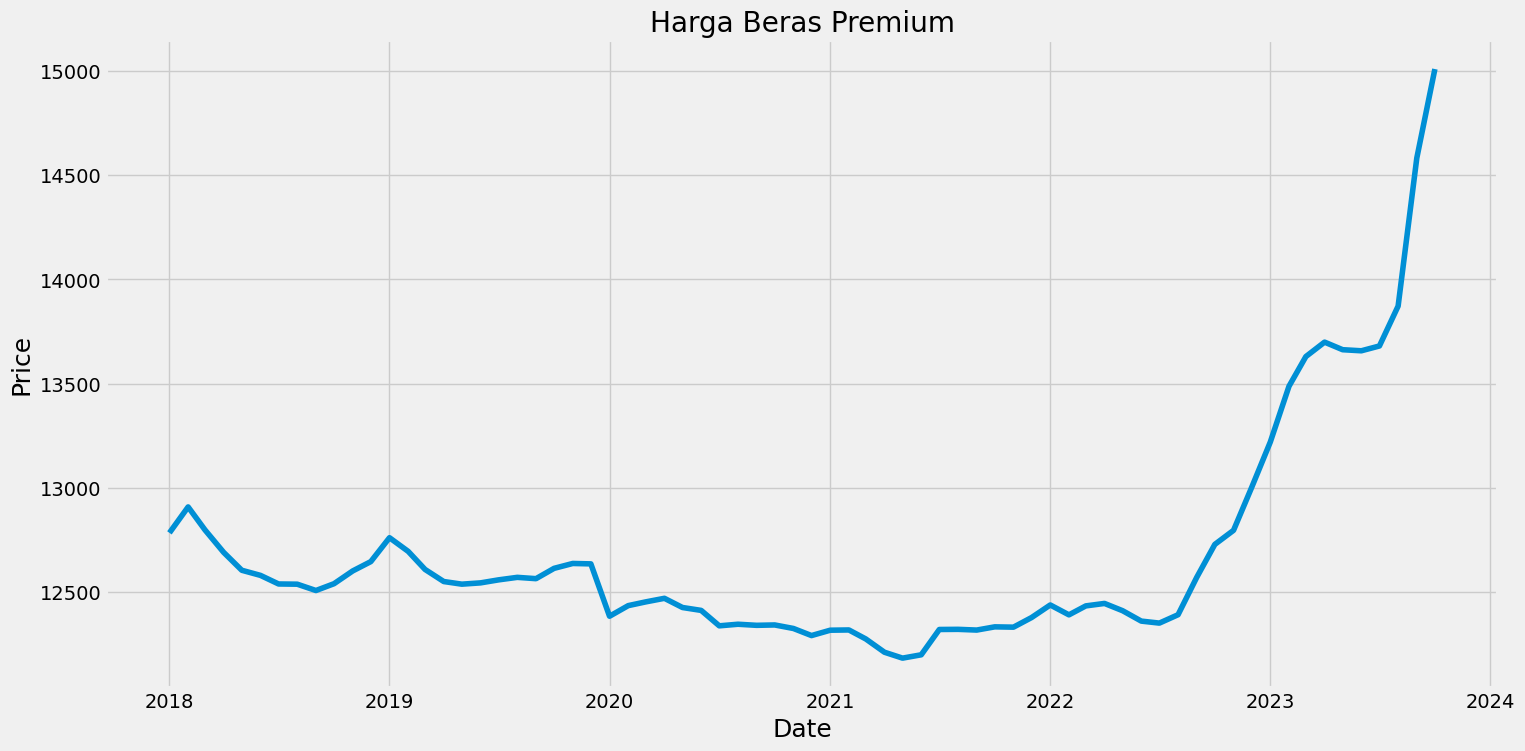

In [5]:
plt.figure(figsize=(16,8))
plt.title('Harga Beras Premium')
plt.plot(df_pg['Date'],df_pg['Price'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

## **Data Latih**

In [6]:
data_pg = df_pg.filter(['Price'])
dataset_pg = data_pg.values
training_data_len_pg = math.ceil(len(dataset_pg)* 0.9)
training_data_len_pg

63

##**MinMax**

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_pg = scaler.fit_transform(dataset_pg)

scaled_data_pg

array([[0.21266513],
       [0.25666161],
       [0.21757448],
       [0.17946196],
       [0.14916395],
       [0.14046477],
       [0.1258774 ],
       [0.12551529],
       [0.11476608],
       [0.12634173],
       [0.14800727],
       [0.16383611],
       [0.20441218],
       [0.18122376],
       [0.15052913],
       [0.13002696],
       [0.12555733],
       [0.12774127],
       [0.13286751],
       [0.13711981],
       [0.13488934],
       [0.15240375],
       [0.16068665],
       [0.15998632],
       [0.07111329],
       [0.0891169 ],
       [0.09546546],
       [0.10154479],
       [0.08593598],
       [0.081011  ],
       [0.05482553],
       [0.0575321 ],
       [0.05568629],
       [0.05631636],
       [0.05032563],
       [0.0383042 ],
       [0.04738926],
       [0.04782724],
       [0.0325592 ],
       [0.01001318],
       [0.        ],
       [0.00565835],
       [0.04861666],
       [0.04887387],
       [0.04762924],
       [0.05309148],
       [0.05256528],
       [0.068

In [8]:
train_data_pg = scaled_data_pg[0:training_data_len_pg+5, :]

x_train_pg =[]
y_train_pg = []

for i in range (5, len(train_data_pg)):
  x_train_pg.append(train_data_pg[i-5:i, 0])
  y_train_pg.append(train_data_pg[i,0])
  if i <= 5:
    print (x_train_pg)
    print (y_train_pg)

len(x_train_pg)

[array([0.21266513, 0.25666161, 0.21757448, 0.17946196, 0.14916395])]
[0.14046477054225637]


63

In [9]:
x_train_pg, y_train_pg = np.array(x_train_pg), np.array(y_train_pg)

x_train_pg = np.reshape(x_train_pg, (x_train_pg.shape[0], x_train_pg.shape[1], 1))
x_train_pg.shape

(63, 5, 1)

## **Data Uji**

In [10]:
test_data_pg = scaled_data_pg[training_data_len_pg - 5:, :]

x_test_pg = []
y_test_pg = dataset_pg[training_data_len_pg:, :]
for i in range(5, len(test_data_pg)):
  x_test_pg.append(test_data_pg[i-5:i,0])
if i <= 5:
    print (x_train_pg)
    print (y_train_pg)

x_test_pg = np.array(x_test_pg)

x_test_pg = np.reshape(x_test_pg, (x_test_pg.shape[0], x_test_pg.shape[1]))
x_test_pg.shape

(7, 5)

# **Membangun Arsitektur LSTM**

In [11]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def create_model(LSTM_units=128, dropout_rate=0.1):
    model = Sequential()
    model.add(LSTM(LSTM_units, return_sequences=True, batch_input_shape=(16, x_train_pg.shape[1], 1)))
    model.add(LSTM(LSTM_units, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

param_grid = {
    'LSTM_units': [128, 256, 512],
    'dropout_rate': [0.1, 0.2],
    'epochs': [50, 100],
    'batch_size': [32, 64]
}

best_score = float('-inf')
best_params = None

for LSTM_units in param_grid['LSTM_units']:
    for dropout_rate in param_grid['dropout_rate']:
        for epochs in param_grid['epochs']:
            for batch_size in param_grid['batch_size']:
                model = create_model(LSTM_units=LSTM_units, dropout_rate=dropout_rate)
                history = model.fit(x_train_pg, y_train_pg, epochs=epochs, batch_size=batch_size, verbose=1)
                score = -np.min(history.history['loss'])

                if score > best_score:
                    best_score = score
                    best_params = {'LSTM_units': LSTM_units, 'dropout_rate': dropout_rate, 'epochs': epochs, 'batch_size': batch_size}

print("Best parameters found: ", best_params)
print("Best mean test score: ", best_score)

Epoch 1/50
2/2 [==============================] - 4s 27ms/step - loss: 0.0393
Epoch 2/50
2/2 [==============================] - 0s 24ms/step - loss: 0.0242
Epoch 3/50
2/2 [==============================] - 0s 23ms/step - loss: 0.0142
Epoch 4/50
2/2 [==============================] - 0s 23ms/step - loss: 0.0123
Epoch 5/50
2/2 [==============================] - 0s 24ms/step - loss: 0.0129
Epoch 6/50
2/2 [==============================] - 0s 25ms/step - loss: 0.0103
Epoch 7/50
2/2 [==============================] - 0s 29ms/step - loss: 0.0078
Epoch 8/50
2/2 [==============================] - 0s 27ms/step - loss: 0.0069
Epoch 9/50
2/2 [==============================] - 0s 31ms/step - loss: 0.0072
Epoch 10/50
2/2 [==============================] - 0s 26ms/step - loss: 0.0067
Epoch 11/50
2/2 [==============================] - 0s 24ms/step - loss: 0.0053
Epoch 12/50
2/2 [==============================] - 0s 24ms/step - loss: 0.0049
Epoch 13/50
2/2 [==============================] - 0s 33ms/st

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def create_model(LSTM_units=128, dropout_rate=0.1):
    model = Sequential()
    model.add(LSTM(LSTM_units, return_sequences=True, batch_input_shape=(16, x_train_pg.shape[1], 1)))
    model.add(LSTM(LSTM_units, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model


results = []
param_grid = {
    'LSTM_units': [128, 256, 512],
    'dropout_rate': [0.1, 0.2],
    'epochs': [50, 100],
    'batch_size': [32, 64]
}

for LSTM_units in param_grid['LSTM_units']:
    for dropout_rate in param_grid['dropout_rate']:
        for epochs in param_grid['epochs']:
            for batch_size in param_grid['batch_size']:
                model = create_model(LSTM_units=LSTM_units, dropout_rate=dropout_rate)
                history = model.fit(x_train_pg, y_train_pg, epochs=epochs, batch_size=batch_size, verbose=0)
                mse = history.history['loss'][-1]
                score = -mse

                result = {
                    'MSE': mse,
                    'LSTM_units': LSTM_units,
                    'dropout_rate': dropout_rate,
                    'epochs': epochs,
                    'batch_size': batch_size
                }

                results.append(result)

results_df = pd.DataFrame(results)
print(results_df)

best_params_df = results_df.loc[results_df['MSE'].idxmin()]

print("\nBest parameters found:")
print(best_params_df)

         MSE  LSTM_units  dropout_rate  epochs  batch_size
0   0.003215         128           0.1      50          32
1   0.004222         128           0.1      50          64
2   0.001618         128           0.1     100          32
3   0.002811         128           0.1     100          64
4   0.003210         128           0.2      50          32
5   0.004199         128           0.2      50          64
6   0.001636         128           0.2     100          32
7   0.002915         128           0.2     100          64
8   0.001756         256           0.1      50          32
9   0.003287         256           0.1      50          64
10  0.001310         256           0.1     100          32
11  0.001579         256           0.1     100          64
12  0.001758         256           0.2      50          32
13  0.003458         256           0.2      50          64
14  0.001289         256           0.2     100          32
15  0.001610         256           0.2     100          

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


def create_model(LSTM_units=128, dropout_rate=0.1):
    model = Sequential()
    model.add(LSTM(LSTM_units, return_sequences=True, batch_input_shape=(16, x_train_pg.shape[1], 1)))
    model.add(LSTM(LSTM_units, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


results = []
param_grid = {
    'LSTM_units': [128, 256, 512],
    'dropout_rate': [0.1, 0.2],
    'epochs': [50, 100],
    'batch_size': [32, 64]
}

for LSTM_units in param_grid['LSTM_units']:
    for dropout_rate in param_grid['dropout_rate']:
        for epochs in param_grid['epochs']:
            for batch_size in param_grid['batch_size']:
                model = create_model(LSTM_units=LSTM_units, dropout_rate=dropout_rate)
                history = model.fit(x_train_pg, y_train_pg, epochs=epochs, batch_size=batch_size, verbose=0)
                mse = history.history['loss'][-1]
                epoch_losses = history.history['loss']

                result = {
                    'MSE': mse,
                    'LSTM_units': LSTM_units,
                    'dropout_rate': dropout_rate,
                    'epochs': epochs,
                    'batch_size': batch_size,
                    'epoch_losses': epoch_losses
                }

                results.append(result)

results_df = pd.DataFrame(results)
print(results_df)

         MSE  LSTM_units  dropout_rate  epochs  batch_size  \
0   0.003109         128           0.1      50          32   
1   0.004174         128           0.1      50          64   
2   0.001540         128           0.1     100          32   
3   0.002803         128           0.1     100          64   
4   0.003055         128           0.2      50          32   
5   0.004331         128           0.2      50          64   
6   0.001469         128           0.2     100          32   
7   0.002743         128           0.2     100          64   
8   0.001755         256           0.1      50          32   
9   0.003391         256           0.1      50          64   
10  0.001249         256           0.1     100          32   
11  0.001592         256           0.1     100          64   
12  0.001691         256           0.2      50          32   
13  0.003361         256           0.2      50          64   
14  0.001248         256           0.2     100          32   
15  0.00

In [ ]:
predictions = model.predict(x_test_pg)
predictions= scaler.inverse_transform(predictions)

1/1 [==============================] - 1s 1s/step


In [ ]:
# menyimpan model
model.save(f'model LSTM 90:10.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Error LSTM**

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_percentage_error
model1 = load_model('model LSTM 90:10.h5')

In [ ]:
predictions = model1.predict(x_test_pg)
predictions= scaler.inverse_transform(predictions)

1/1 [==============================] - 1s 945ms/step


In [ ]:
RMSE = np.sqrt(np.mean( predictions - y_test_pg)**2)
print('Nilai RMSE = ', RMSE)
MAPE = mean_absolute_percentage_error(y_test_pg,predictions)*100
print('Nilai MAPE = ', MAPE)

Nilai RMSE =  200.66559222387045
Nilai MAPE =  2.1022549653432514


# **Plot Aktual vs Prediksi**

<ipython-input-17-e503ed0156a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Prediksi'] = predictions


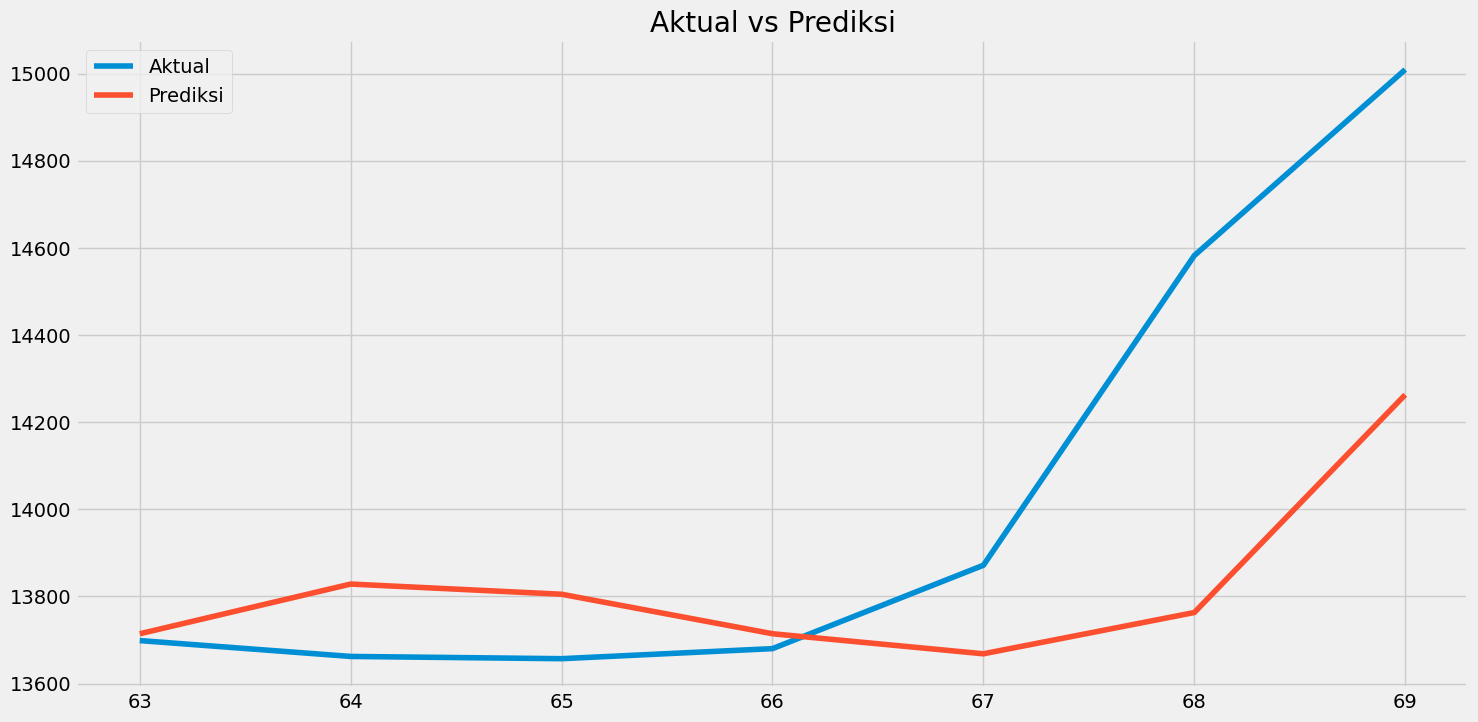

In [ ]:
df1 = data_pg[training_data_len_pg:]
df1['Prediksi'] = predictions
plt.figure(figsize=(16,8))
plt.title('Aktual vs Prediksi')
plt.plot(df1['Price'])
plt.plot(df1['Prediksi'])
plt.legend(['Aktual','Prediksi'],loc="best")

<ipython-input-18-38d8fd2239d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


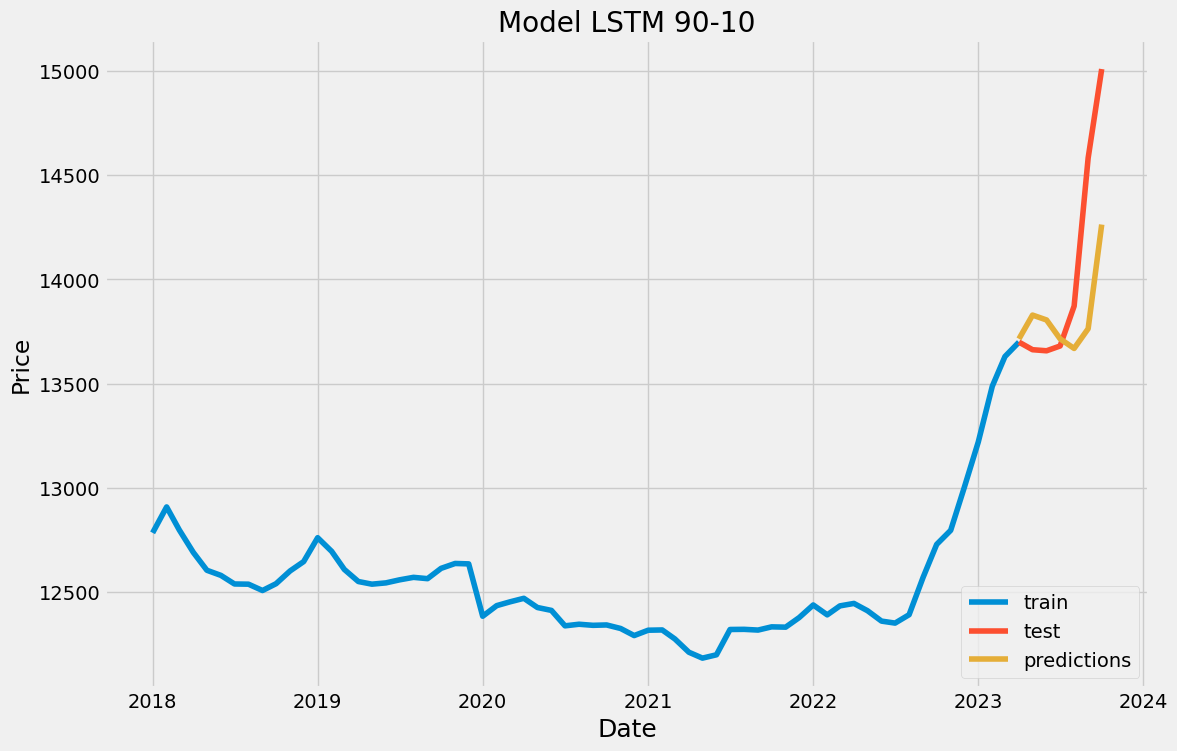

In [ ]:
train = df_pg[:training_data_len_pg+1]
valid = df_pg[training_data_len_pg:]
valid['predictions'] = predictions

plt.figure(figsize=(12,8))
plt.title('Model LSTM 90-10')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price')
plt.plot(train['Date'],train['Price'])
plt.plot(valid['Date'],valid[['Price','predictions']])
plt.legend(['train','test','predictions'], loc='lower right')
plt.show()

In [ ]:
valid
valid.to_excel('Hasil Prediksi LSTM 90:10.xlsx', index = False)

In [ ]:
data_baru = pd.read_excel('/content/Hasil Prediksi LSTM 90:10.xlsx')
data_baru

,Date,Price,predictions
0,2023-04-01,13698.751402,13714.387695
1,2023-05-01,13662.345849,13828.446289
2,2023-06-01,13657.195180,13805.057617
3,2023-07-01,13680.269258,13714.457031
4,2023-08-01,13871.605208,13668.405273
5,2023-09-01,14582.197472,13763.125000
6,2023-10-01,15008.982278,14262.808594


## Prediksi 3 Bulan ke Depan

In [ ]:
df = pd.read_excel('forecastinglstm.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df

,Price
Date,
2018-01-01,12783.678065
2018-02-01,12908.028646
2018-03-01,12797.553737
2018-04-01,12689.833424
2018-05-01,12604.199886
...,...
2023-06-01,13657.195180
2023-07-01,13680.269258
2023-08-01,13871.605208


In [ ]:
last_date = df.index[-1]
new_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=3, freq='M')

new_data = pd.DataFrame(index=new_dates)
numeric_dates = (new_data.index - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
predictions = model.predict(numeric_dates.values.reshape(-1, 1))

predicted_df = pd.DataFrame(index=new_data.index)
predicted_df['Predicted Price'] = predictions.flatten()

print("Predictions for the next 3 months:")
print(predicted_df)


1/1 [==============================] - 1s 962ms/step
Predictions for the next 3 months:
            Predicted Price
2023-11-30         9.680528
2023-12-31         9.680528
2024-01-31         9.680528
